In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("D:\Table\geomorphology.csv")

In [5]:
data.head()

,LEGEND_SHO,area
0,Pediment Pediplain Complex,222
1,Flood Plain,1778
2,Alluvial Plain,819
3,Waterbodies-Other,33
4,Deltaic Plain,329


In [9]:
df=pd.DataFrame(data)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12820\1841684792.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='LEGEND_SHO', y='area',palette="Paired")


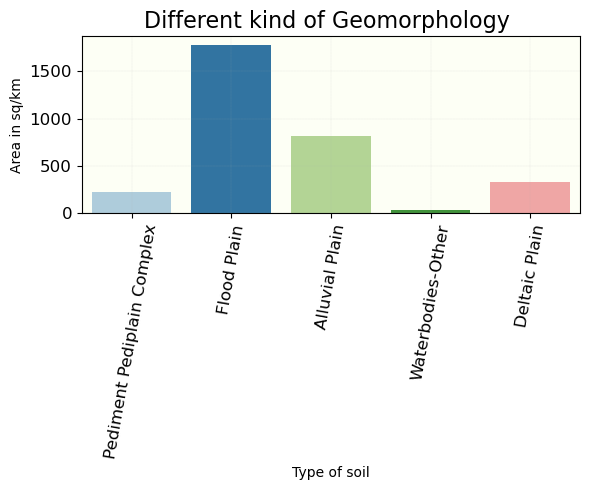

In [18]:
plt.figure(figsize=(6,5))
sns.barplot(data=df, x='LEGEND_SHO', y='area',palette="Paired")
plt.title('Different kind of Geomorphology ',fontsize=16)
plt.xlabel('Type of soil')
plt.ylabel('Area in sq/km')
plt.xticks(rotation=80)
# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.1)
# Improve the layout and readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Set background color
plt.gca().set_facecolor('#fdfff5')
plt.tight_layout()
plt.show()

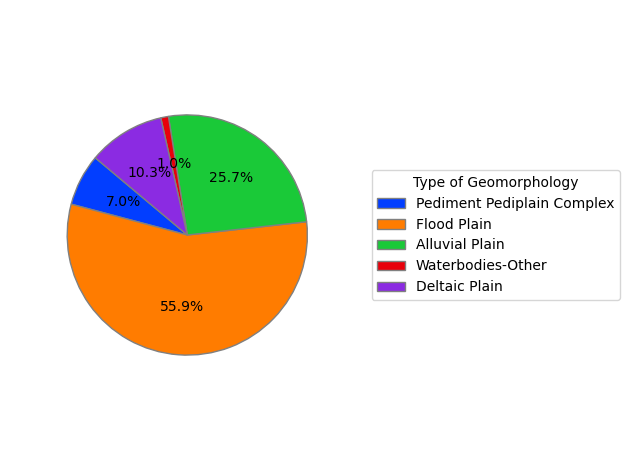

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming you have already created the pie chart
plt.pie(df['area'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("bright"), wedgeprops={'edgecolor': 'grey'})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
# Add a legend outside the pie chart
plt.legend(df['LEGEND_SHO'], title="Type of Geomorphology", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()


In [8]:
data=pd.read_csv("D:/Table/twi.csv")
data.head()

,TWI,Area ( In Hectors )
0,4.66-7.78,122330.70
1,7.79-9.45,72834.03
2,9.46-11.48,81637.74
3,11.49-14.45,31537.71
4,14.46-23.16,8647.92


In [3]:
data=pd.read_csv("D:/Table/tpi.csv")

In [4]:
data.head()

,TPI,area
0,a,55847.7
1,b,131871.0
2,c,70837.3
3,d,44244.4
4,e,18996.2


In [ ]:
plt.figure(figsize=(4,5))
sns.barplot(data=df1, x='TWI', y='Area ( In Hectors )',palette="Set2")
plt.title('TWI Values Distribution ',fontsize=12)
plt.xlabel('TWI Values')
plt.ylabel('Area ( In Hectors)')
plt.xticks(rotation=80)
# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.1)
# Improve the layout and readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Set background color
plt.gca().set_facecolor('#fdfff5')
plt.tight_layout()
plt.show()

In [6]:
df1=pd.DataFrame(data)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3936\1555703664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='TWI', y='Area ( In Hectors )',palette="Set2")


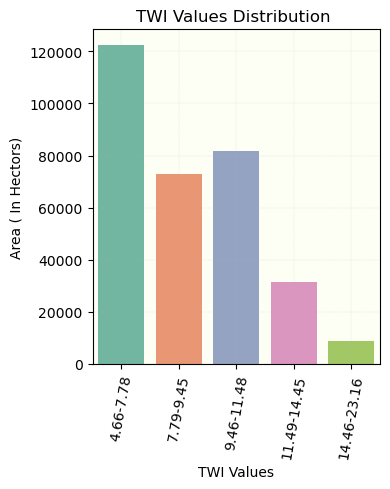

In [20]:
plt.figure(figsize=(4,5))
sns.barplot(data=df1, x='TWI', y='Area ( In Hectors )',palette="Set2")
plt.title('TWI Values Distribution ',fontsize=12)
plt.xlabel('TWI Values')
plt.ylabel('Area ( In Hectors)')
plt.xticks(rotation=80)
# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.1)
# Improve the layout and readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Set background color
plt.gca().set_facecolor('#fdfff5')
plt.tight_layout()
plt.show()

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

Normalised Differenced Vegitation Index

In [2]:
# Load the RED and NIR bands (assuming single-band GeoTIFF files)
red_band_path = "D:/DISSERTATION 24/CRITERIA/Study Area/S2 Image/sb4.tif"
nir_band_path = "D:/DISSERTATION 24/CRITERIA/Study Area/S2 Image/sb8.tif"
with rasterio.open(red_band_path) as red_band:
     red = red_band.read(1).astype('float32')
with rasterio.open(nir_band_path) as nir_band:
    nir = nir_band.read(1).astype('float32')


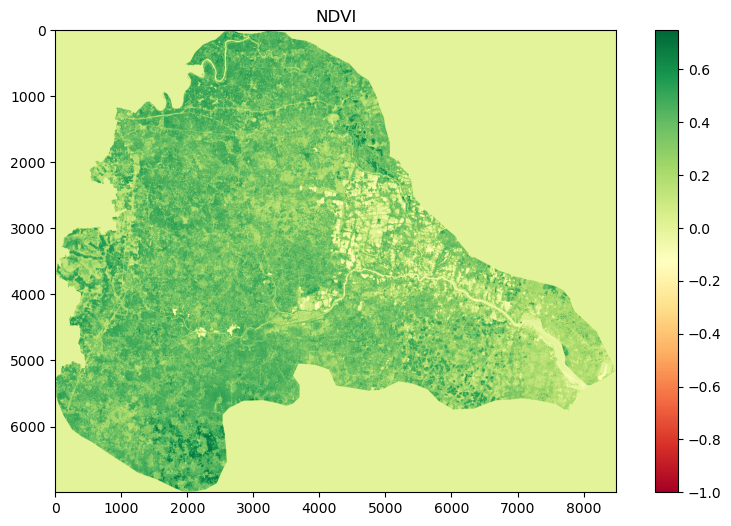

In [3]:
# Avoid division by zero
np.seterr(divide='ignore', invalid='ignore')
# Calculate NDVI
ndvi = (nir - red) / (nir + red)
# Plot NDVI
plt.figure(figsize=(10, 6))
plt.title('NDVI')
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.show()


In [4]:
# Save NDVI as GeoTIFF
output_path = "D:/DISSERTATION 24/Python Spatial analysis/ndvi.tif"
with rasterio.open(
    output_path,
    'w',
    driver='GTiff',
    height=red.shape[0],
    width=red.shape[1],
    count=1,
    dtype=rasterio.float32,
    crs=red_band.crs,
    transform=red_band.transform,
) as dst:
    dst.write(ndvi, 1)

Normalised Diferenced Water Index

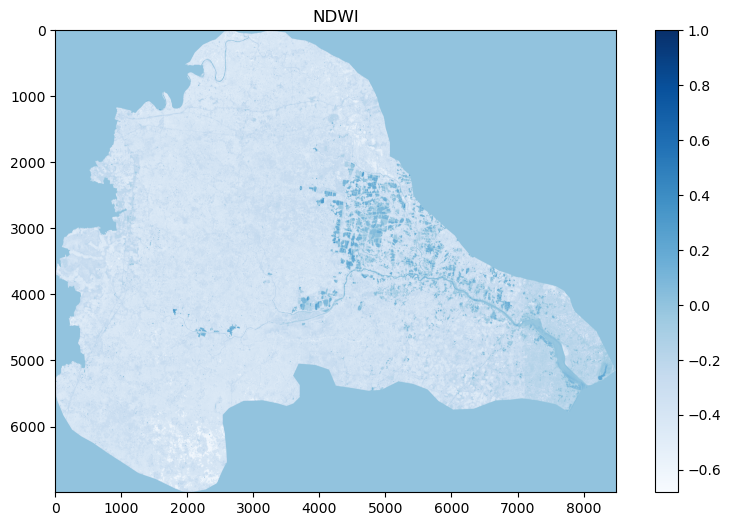

In [5]:
# Paths to the Green and NIR band files (GeoTIFF format)
green_band_path = "D:/DISSERTATION 24/CRITERIA/Study Area/S2 Image/sb3.tif"
nir_band_path = "D:/DISSERTATION 24/CRITERIA/Study Area/S2 Image/sb8.tif"
# Open and read the Green band
with rasterio.open(green_band_path) as green_band:
    green = green_band.read(1).astype('float32')
# Open and read the NIR band
with rasterio.open(nir_band_path) as nir_band:
    nir = nir_band.read(1).astype('float32')
# Avoid division by zero
np.seterr(divide='ignore', invalid='ignore')
# Calculate NDWI
ndwi = (green - nir) / (green + nir)
# Plot NDWI
plt.figure(figsize=(10, 6))
plt.title('NDWI')
plt.imshow(ndwi, cmap='Blues')
plt.colorbar()
plt.show()
# Save NDWI as a GeoTIFF
output_path = "D:/DISSERTATION 24/Python Spatial analysis/ndwi.tif"
with rasterio.open(
    output_path,
    'w',
    driver='GTiff',
    height=green.shape[0],
    width=green.shape[1],
    count=1,
    dtype=rasterio.float32,
    crs=green_band.crs,
    transform=green_band.transform,
) as dst:
    dst.write(ndwi, 1)


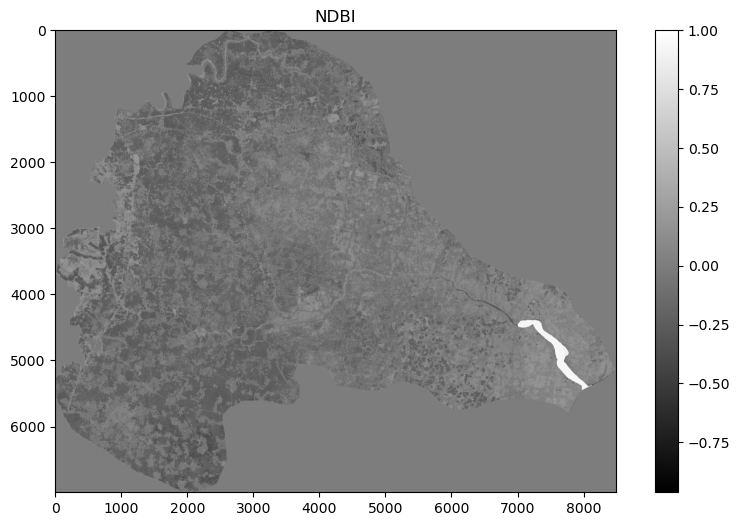

In [7]:
import rasterio
from rasterio.enums import Resampling
import numpy as np
import matplotlib.pyplot as plt
# Paths to the SWIR and NIR band files (GeoTIFF format)
swir_band_path = "D:/DISSERTATION 24/CRITERIA/Study Area/S2 Image/sb11.tif"
nir_band_path = "D:/DISSERTATION 24/CRITERIA/Study Area/S2 Image/sb8.tif"
# Open and read the SWIR band
with rasterio.open(swir_band_path) as swir_band:
    swir = swir_band.read(1).astype('float32')
    swir_profile = swir_band.profile
# Open and read the NIR band
with rasterio.open(nir_band_path) as nir_band:
    nir = nir_band.read(
        1,
        out_shape=(swir_band.height, swir_band.width),
        resampling=Resampling.bilinear
    ).astype('float32')
# Avoid division by zero
np.seterr(divide='ignore', invalid='ignore')
# Calculate NDBI
ndbi = (swir - nir) / (swir + nir)
# Plot NDBI
plt.figure(figsize=(10, 6))
plt.title('NDBI')
plt.imshow(ndbi, cmap='gray')
plt.colorbar()
plt.show()
# Save NDBI as a GeoTIFF
output_path = "D:/DISSERTATION 24/Python Spatial analysis/ndbi.tif"
with rasterio.open(
    output_path,
    'w',
    driver='GTiff',
    height=swir.shape[0],
    width=swir.shape[1],
    count=1,
    dtype=rasterio.float32,
    crs=swir_profile['crs'],
    transform=swir_profile['transform'],
) as dst:
    dst.write(ndbi, 1)


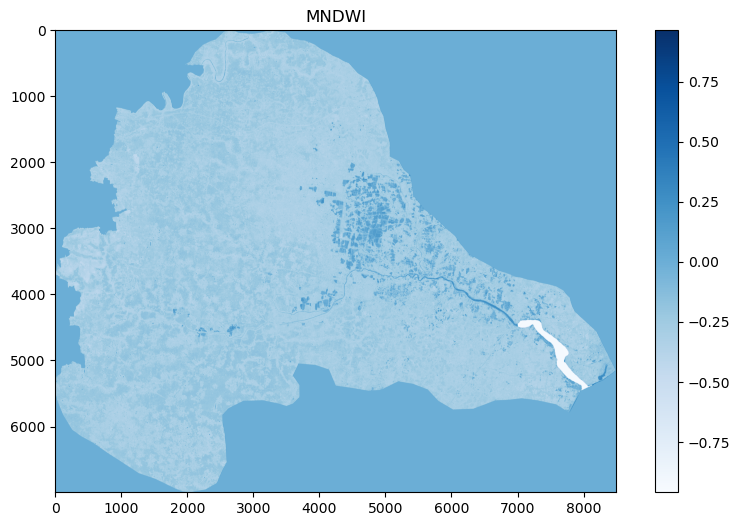

In [8]:
import rasterio
from rasterio.enums import Resampling
import numpy as np
import matplotlib.pyplot as plt
# Paths to the Green and SWIR band files (GeoTIFF format)
green_band_path = "D:/DISSERTATION 24/CRITERIA/Study Area/S2 Image/sb3.tif"
swir_band_path = "D:/DISSERTATION 24/CRITERIA/Study Area/S2 Image/sb11.tif"
# Open and read the Green band
with rasterio.open(green_band_path) as green_band:
    green = green_band.read(1).astype('float32')
    green_profile = green_band.profile
# Open and read the SWIR band
with rasterio.open(swir_band_path) as swir_band:
    swir = swir_band.read(
        1,
        out_shape=(green_band.height, green_band.width),
        resampling=Resampling.bilinear
    ).astype('float32')
# Avoid division by zero
np.seterr(divide='ignore', invalid='ignore')
# Calculate MNDWI
mndwi = (green - swir) / (green + swir)
# Plot MNDWI
plt.figure(figsize=(10, 6))
plt.title('MNDWI')
plt.imshow(mndwi, cmap='Blues')
plt.colorbar()
plt.show()
# Save MNDWI as a GeoTIFF
output_path = "D:/DISSERTATION 24/Python Spatial analysis/mndwi.tif"
with rasterio.open(
    output_path,
    'w',
    driver='GTiff',
    height=green.shape[0],
    width=green.shape[1],
    count=1,
    dtype=rasterio.float32,
    crs=green_profile['crs'],
    transform=green_profile['transform'],
) as dst:
    dst.write(mndwi, 1)


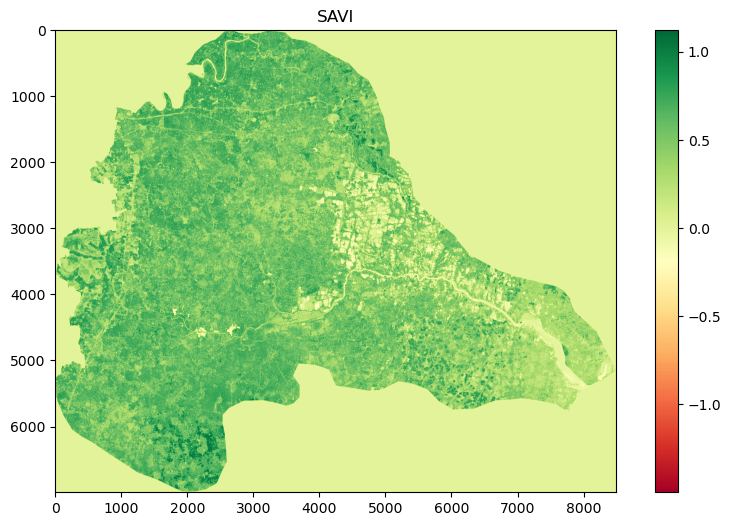

In [9]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
# Paths to the RED and NIR band files (GeoTIFF format)
red_band_path = "D:/DISSERTATION 24/CRITERIA/Study Area/S2 Image/sb4.tif"
nir_band_path = "D:/DISSERTATION 24/CRITERIA/Study Area/S2 Image/sb8.tif"
# Open and read the RED band
with rasterio.open(red_band_path) as red_band:
    red = red_band.read(1).astype('float32')
    red_profile = red_band.profile
# Open and read the NIR band
with rasterio.open(nir_band_path) as nir_band:
    nir = nir_band.read(
        1,
        out_shape=(red_band.height, red_band.width),
        resampling=Resampling.bilinear
    ).astype('float32')
# Define the soil adjustment factor L
L = 0.5
# Avoid division by zero
np.seterr(divide='ignore', invalid='ignore')
# Calculate SAVI
savi = ((nir - red) / (nir + red + L)) * (1 + L)
# Plot SAVI
plt.figure(figsize=(10, 6))
plt.title('SAVI')
plt.imshow(savi, cmap='RdYlGn')
plt.colorbar()
plt.show()
# Save SAVI as a GeoTIFF
output_path = "D:/DISSERTATION 24/Python Spatial analysis/savi.tif"
with rasterio.open(
    output_path,
    'w',
    driver='GTiff',
    height=red.shape[0],
    width=red.shape[1],
    count=1,
    dtype=rasterio.float32,
    crs=red_profile['crs'],
    transform=red_profile['transform'],
) as dst:
    dst.write(savi, 1)


In [18]:
import rasterio
from rasterio.enums import Resampling
import numpy as np
import matplotlib.pyplot as plt
# Paths to the required band files (GeoTIFF format)
red_band_path = "D:/DISSERTATION 24/CRITERIA/Study Area/S2 Image/sb4.tif"
nir_band_path = "D:/DISSERTATION 24/CRITERIA/Study Area/S2 Image/sb8.tif"
green_band_path = "D:/DISSERTATION 24/CRITERIA/Study Area/S2 Image/sb3.tif"
swir_band_path = "D:/DISSERTATION 24/CRITERIA/Study Area/S2 Image/sb11.tif"
# Function to read and resample a band
def read_and_resample(band_path, reference_profile):
    with rasterio.open(band_path) as band:
        data = band.read(
            1,
            out_shape=(reference_profile['height'], reference_profile['width']),
            resampling=Resampling.bilinear
        ).astype('float32')
    return data
# Open the RED band to get the reference profile
with rasterio.open(red_band_path) as red_band:
    red = red_band.read(1).astype('float32')
    red_profile = red_band.profile
# Read and resample the other bands
nir = read_and_resample(nir_band_path, red_profile)
blue = read_and_resample(blue_band_path, red_profile)
green = read_and_resample(green_band_path, red_profile)
swir = read_and_resample(swir_band_path, red_profile)
# Avoid division by zero
np.seterr(divide='ignore', invalid='ignore')
# Calculate NDVI
ndvi = (nir - red) / (nir + red)
# Calculate NDWI
ndwi = (green - nir) / (green + nir)
# Calculate NDBI
ndbi = (swir - nir) / (swir + nir)
# Calculate SAVI
L = 0.5
savi = ((nir - red) / (nir + red + L)) * (1 + L)
# Stack all indices into a single array
stacked_indices = np.stack([ndvi, ndwi, ndbi, savi])
# Save the stacked indices as a multi-band GeoTIFF
stacked_output_path = 'D:/DISSERTATION 24/Python Spatial analysis/stacked_indices.tif'
with rasterio.open(
    stacked_output_path,
    'w',
    driver='GTiff',
    height=red.shape[0],
    width=red.shape[1],
    count=stacked_indices.shape[0],
    dtype=rasterio.float32,
    crs=red_profile['crs'],
    transform=red_profile['transform'],
) as dst:
    for i in range(stacked_indices.shape[0]):
        dst.write(stacked_indices[i, :, :], i + 1)


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data=pd.read_csv("D:\DISSERTATION 24\Literacy\literacy.csv")

In [34]:
df=pd.DataFrame(data)

In [35]:
df

,Block,Literacy Rate
0,Mohanpur,80.51
1,Kharagpur-I,77.06
2,Kharagpur-II,76.08
3,Debra,82.03
4,Pingla,83.57
5,Keshiary,76.78
6,Dantan-I,73.57
7,Sabong,86.84
8,Narayangarh,78.18
9,Dantan-II,82.45


In [36]:
df.tail()

,Block,Literacy Rate
22,Potashpur-II,86.50
23,Bhagawanpur-I,88.13
24,Bhagawanpur-II,90.98
25,Chandipur,87.81
26,Khejuri-I,88.90


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load data from CSV
file_path = r"D:\DISSERTATION 24\Population\population.csv"
df = pd.read_csv(file_path)
# Verify column names
print(df.columns)



Index(['Block', 'Male', 'Female'], dtype='object')


In [13]:
# Ensure columns have no leading/trailing spaces
df.columns = df.columns.str.strip()
# Display first few rows of the DataFrame
print(df.head())

          Block    Male  Female
0      Mohanpur   49147   47176
1   Kharagpur-I  121717  115511
2  Kharagpur-II   82350   79478
3         Debra  129224  125996
4        Pingla   88433   82633


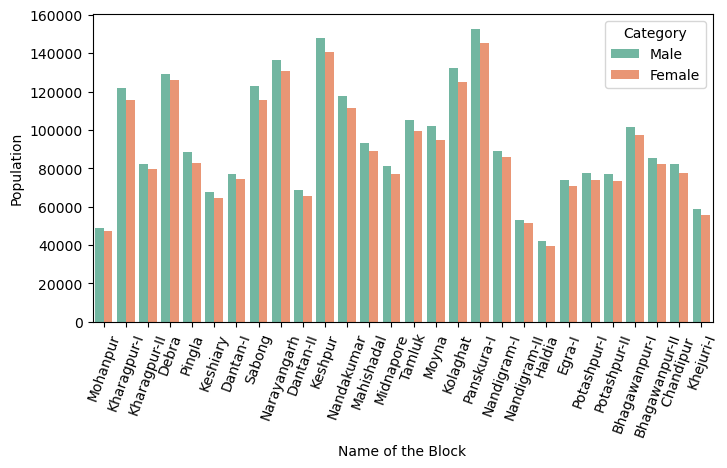

In [23]:
# Bar Plot using Seaborn with correct column names
plt.figure(figsize=(8,4))  # Adjust the width and height as needed
# Melt the DataFrame
df_melted = df.melt(id_vars=['Block'], value_vars=['Male','Female'], 
                    var_name='Category',value_name='Count')
# Plot
sns.barplot(x='Block', y='Count', hue='Category', data=df_melted, palette="Set2")
plt.xlabel('Name of the Block',fontsize=10)
plt.ylabel('Population',fontsize=10)
plt.xticks(rotation=70)
# Show plot
plt.show()

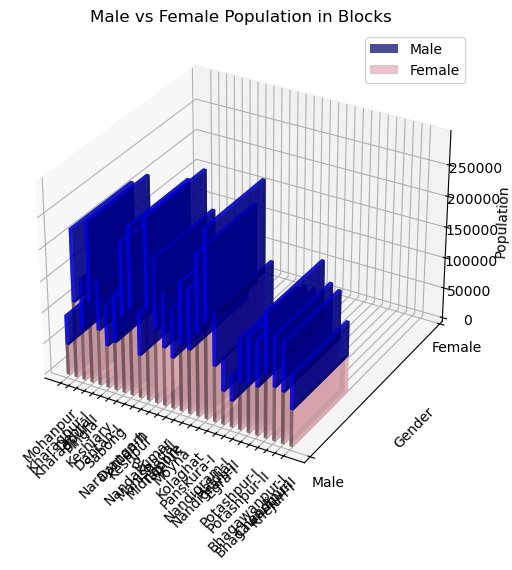

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
# Example data
# Creating 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
# Prepare data
x = np.arange(len(df['Block']))
y = np.zeros(len(df['Block']))
z_male = np.array(df['Male'])
z_female = np.array(df['Female'])
# Plot bars
ax.bar3d(x, y, z_male, 0.4, 0.4, z_female, color='blue', alpha=0.7, label='Male')
ax.bar3d(x, y, z_male, 0.4, 0.4, -z_male, color='pink', alpha=0.7, label='Female')
# Labels and ticks
ax.set_xlabel('Block')
ax.set_ylabel('Gender')
ax.set_zlabel('Population')
ax.set_xticks(x)
ax.set_xticklabels(df['Block'], rotation=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(['Male', 'Female'])
ax.set_title('Male vs Female Population in Blocks')
# Legend
ax.legend()
plt.show()


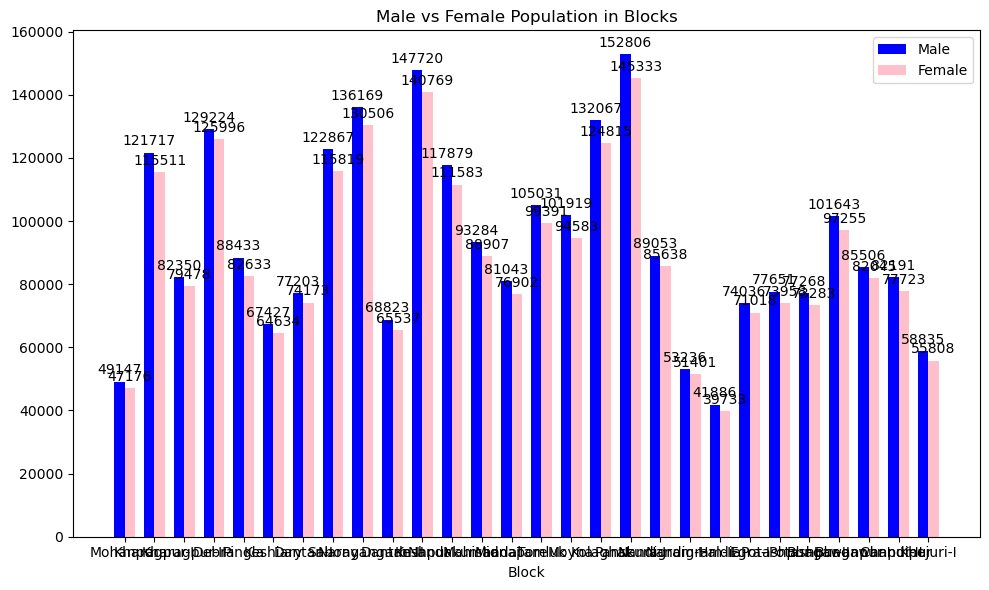

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting data
blocks = df['Block']
male_counts = df['Male']
female_counts = df['Female']
x = np.arange(len(blocks))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, male_counts, width, label='Male', color='blue')
rects2 = ax.bar(x + width/2, female_counts, width, label='Female', color='pink')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Block')
ax.set_title('Male vs Female Population in Blocks')
ax.set_xticks(x)
ax.set_xticklabels(blocks)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()